In [1]:

import time
import pandas as pd
import numpy as np
import Network as net
import Seeker
import random
from common import KM_method
import Vehicle
import os
import pickle

with open('output\\2017-05-01\\history_order.pkl', "rb") as tf:
    orders = pickle.load(tf)

matchingWeight = {}
soloWeight = {}
waitingWeight = {}
waitingTime = {}
O_location = {}
for key in orders.keys():
    matchingWeight[orders[key].id] = orders[key].matchingWeight
    soloWeight[orders[key].id] = orders[key].soloWeight
    waitingWeight[orders[key].id] = orders[key].waitingWeight
    waitingTime[orders[key].id] = orders[key].waitingtime
    O_location[orders[key].id] = orders[key].O_location
    print('order',orders[key].id)
    print('matchingWeight',orders[key].matchingWeight)
    print('soloWeight',orders[key].soloWeight)
    print('waitingWeight',orders[key].waitingWeight)


order 17592367479989
matchingWeight 0
soloWeight 12.60382601097568
waitingWeight 198.11380138541824
order 17592367523278
matchingWeight 0
soloWeight 448.74757923294953
waitingWeight 511.43759704063547
order 17592367487005
matchingWeight 0
soloWeight 654.1245602092724
waitingWeight 929.011954578121
order 17592367581362
matchingWeight 0
soloWeight 2293.5838208444848
waitingWeight 2024.314386534332
order 17592367524423
matchingWeight 0
soloWeight 37.49790717178242
waitingWeight 313.3626993516034
order 17592367486477
matchingWeight 0
soloWeight 216.52036235788603
waitingWeight 729.370822509964
order 17592367529272
matchingWeight 0
soloWeight 29.96086847155799
waitingWeight 218.05069242883093
order 17592367488793
matchingWeight 0
soloWeight 50.42272350956338
waitingWeight 296.78934839958686
order 17592367680990
matchingWeight 0
soloWeight 92.79254066800428
waitingWeight 213.442198417688
order 17592367527215
matchingWeight 0
soloWeight 4.70442456963318
waitingWeight 0
order 17592367588556
ma

In [66]:
df = pd.DataFrame(columns = ['id','waitingWeight','soloWeight','matchingWeight','waitingTime','O_location'])
df['id'] = waitingWeight.keys()
df['waitingWeight'] = waitingWeight.values()
df['soloWeight'] = soloWeight.values()
df['matchingWeight'] = matchingWeight.values()
df['waitingTime'] = waitingTime.values()
df['O_location'] = O_location.values()


df.head()
order = pd.read_csv('input/order.csv')
order_weight = pd.merge(left=order,right=df,left_on='dwv_order_make_haikou_1.order_id',right_on='id')
order_weight.head()
node = pd.read_csv('input/node.csv')
node = node[['node_id','x_coord','y_coord']]
order_weight = pd.merge(left=order_weight,right=node,left_on='O_location_y',right_on='node_id')
order_weight.to_csv('output/order_weight.csv')
# order_number = order_weight.groupby(['x_coord','y_coord'])['dwv_order_make_haikou_1.order_id'].count().reset_index()
# order_number.columns = ['x_coord','y_coord','order_num']
# order_number.head()
# order_number.to_csv('output/order_num.csv')

In [136]:
# import matplotlib.pyplot as plt
# plt.plot(matchingWeight.values())
# plt.show()
# plt.plot(soloWeight.values())
# plt.show()
# plt.plot(waitingWeight.values())
# plt.show()

order = pd.read_csv('input/order.csv')
order_weight = pd.merge(left=order,right=df,left_on='dwv_order_make_haikou_1.order_id',right_on='id')
order_weight.head()
node = pd.read_csv('input/node.csv')
node = node[['node_id','x_coord','y_coord']]
order_weight = pd.merge(left=order_weight,right=node,left_on='O_location_y',right_on='node_id')
order_weight.to_csv('output/order_weight.csv')

In [138]:
order_weight['waitingTime']
order_weight['wait_solo_diff']

0      155.363637
1       62.243127
2      171.867540
3        9.944286
4       28.011966
          ...    
244    114.214539
245    151.512585
246    146.288278
247     46.653576
248    179.994758
Name: wait_solo_diff, Length: 249, dtype: float64

In [68]:
df['target'] = np.where(df['waitingWeight'] > df['soloWeight'],1, 0)
df['wait_solo_diff'] = df['waitingWeight'] - df['soloWeight']
df['target'].value_counts() # 329
# print(len(df['target']))
df.head()
demand = order_weight.groupby(['O_location_y'])['dwv_order_make_haikou_1.order_id'].count().reset_index()
demand.columns = ['O_location','order_num']
demand.head()
merged = pd.merge(left= df, right=demand, left_on='O_location',right_on='O_location')
merged.head()

,id,waitingWeight,soloWeight,matchingWeight,waitingTime,O_location,target,wait_solo_diff,order_num
0,17592367523278,267.188090,126.982263,0.0,5.0,1344.0,1,140.205827,1
1,17592367487005,459.152126,130.565556,0.0,26.0,1230.0,1,328.586571,2
2,17592368112449,325.409136,139.356417,0.0,45.0,1230.0,1,186.052719,2
3,17592367581362,765.151381,343.583450,0.0,9.0,81.0,1,421.567931,2
4,17592367704821,765.151381,352.204913,0.0,36.0,81.0,1,412.946468,2


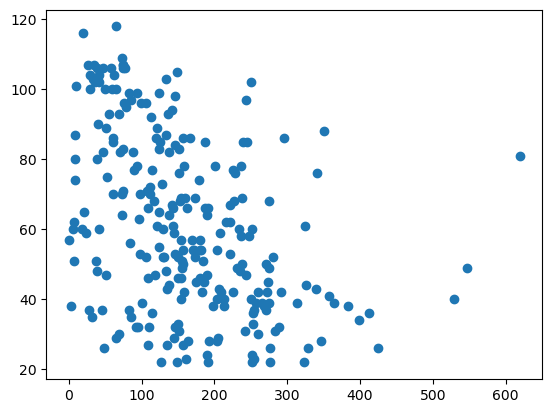

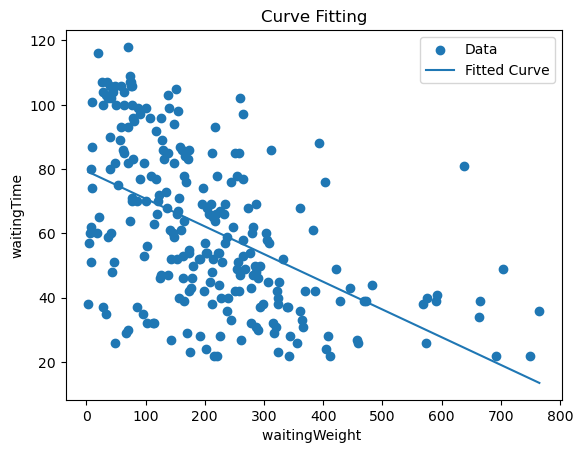

In [135]:
plt.scatter(df['wait_solo_diff'],df['waitingTime'])
# plt.scatter(df['waitingWeight'],df['waitingTime'])
plt.show()
# plt.scatter(merged['order_num'],merged['waitingWeight'])
import numpy as np
import matplotlib.pyplot as plt
df =df[df['waitingTime']> 20]
# Extract the data from the DataFrame
y = df['waitingTime']
x = df['waitingWeight']

# Fit a curve to the data using numpy's polyfit
degree = 1  # Degree of the polynomial fit
coeffs = np.polyfit(x, y, degree)

def inverse_proportion(x, a, b):
    return a / x + b

from scipy.optimize import curve_fit
params, _ = curve_fit(inverse_proportion, x, y)
# Generate the fitted curve
x_fit = np.linspace(min(x), max(x))
y_fit = np.polyval(coeffs, x_fit)
# y_fit = inverse_proportion(x_fit, *params)


# Plot the original data points and the fitted curve
plt.scatter(x, y, label='Data')
plt.plot(x_fit, y_fit, label='Fitted Curve')

# Set the title, axis labels, and legend
plt.title('Curve Fitting')
plt.xlabel('waitingWeight ')
plt.ylabel('waitingTime')
plt.legend()

# Display the plot
plt.show()


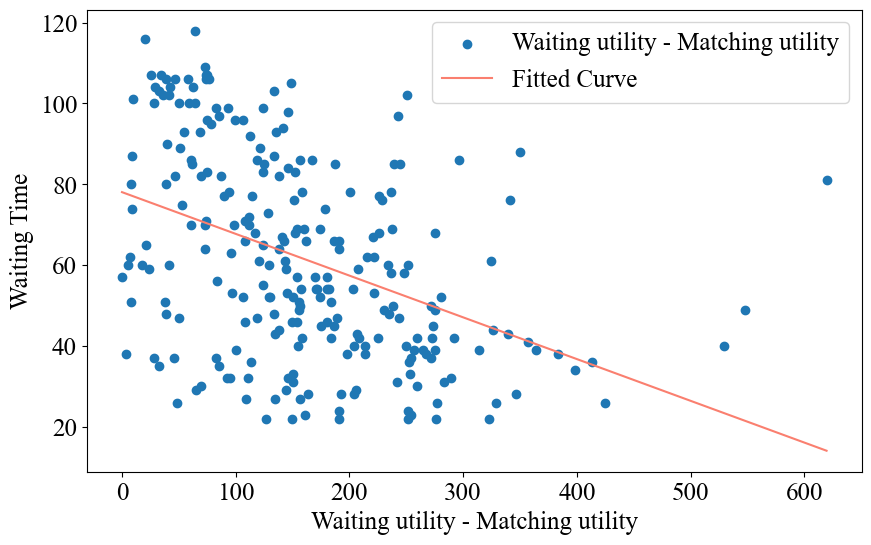

In [131]:
import matplotlib.pyplot as plt
df =df[df['waitingTime']> 20]
df =df[df['wait_solo_diff']> 0]
# Extract the data from the DataFrame
y = df['waitingTime']
x = df['wait_solo_diff']
x1 = df['waitingWeight']
# Fit a curve to the data using numpy's polyfit
degree = 1  # Degree of the polynomial fit
coeffs = np.polyfit(x, y, degree)

def inverse_proportion(x, a, b):
    return a / x + b

plt.figure(figsize=(10, 6)) # 创建一个图形实例，方便同时多画几个图

from scipy.optimize import curve_fit
params, _ = curve_fit(inverse_proportion, x, y)
# Generate the fitted curve
x_fit = np.linspace(min(x), max(x))
y_fit = np.polyval(coeffs, x_fit)
# y_fit = inverse_proportion(x_fit, *params)


# Plot the original data points and the fitted curve
plt.scatter(x, y, label='Waiting utility - Matching utility') # , color ='#82B0D2'
plt.plot(x_fit, y_fit,label='Fitted Curve', color = '#FA7F6F') # , color = '#FA7F6F'

import seaborn as sns
import matplotlib.pyplot as plt
label_font = {'family' : 'Times New Roman', 'size'   : 18}
font = {'family' : 'Times New Roman', 'size'   : 18}
# Set the title, axis labels, and legend
plt.xlabel('Waiting utility - Matching utility',fontdict= font)
plt.ylabel('Waiting Time',fontdict= font)
plt.legend(prop=label_font)
plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.xticks(fontproperties = 'Times New Roman', size = 18)
# Display the plot
plt.show()

In [116]:
import numpy as np

# Extract the variables from your DataFrame
x = df['waitingTime']
y = df['waitingWeight']

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]

# Print the correlation coefficient
print("Correlation coefficient:", correlation_coefficient)



import pandas as pd

x = df['waitingTime']
y = df['waitingWeight']

# Pearson correlation coefficient (r)
pearson_corr = x.corr(y)

# Spearman's rank correlation coefficient (ρ)
spearman_corr = x.corr(y, method='spearman')

# Kendall's rank correlation coefficient (τ)
kendall_corr = x.corr(y, method='kendall')


print("Pearson correlation coefficient: ", pearson_corr)
print("Spearman's rank correlation coefficient: ", spearman_corr)
print("Kendall's rank correlation coefficient: ", kendall_corr)
print('x',x)
print('y',y)
tmp = pd.DataFrame({'x': x, 'y': y})
tmp.to_csv('tmp.csv', index=False)

Correlation coefficient: -0.5001668133767087
Pearson correlation coefficient:  -0.5001668133767087
Spearman's rank correlation coefficient:  -0.5364179819278061
Kendall's rank correlation coefficient:  -0.3895139145535381
x 1       26.0
3       46.0
4      104.0
6       88.0
8       35.0
       ...  
385     27.0
386     38.0
387     60.0
388     43.0
389     68.0
Name: waitingTime, Length: 252, dtype: float64
y 1      459.152126
3      163.039849
4       28.919832
6      393.112163
8       95.737246
          ...    
385    456.671163
386      3.627561
387     17.865546
388    445.937576
389    361.369182
Name: waitingWeight, Length: 252, dtype: float64


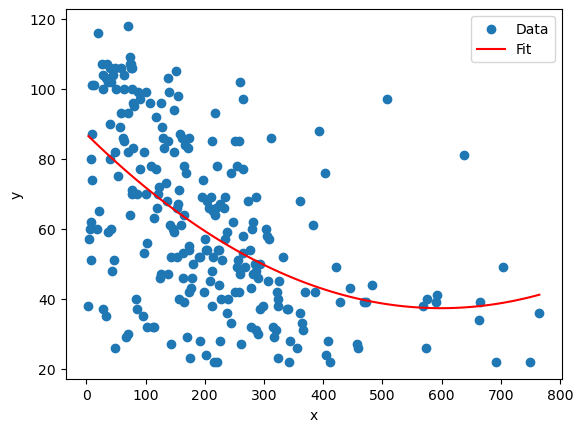

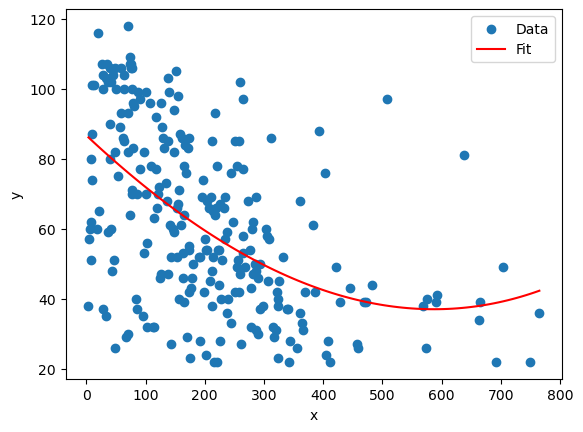

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取数据
data = pd.read_csv('tmp.csv')

# 提取 x 和 y 列的值
x = data['y']
y = data['x']

# 进行多项式拟合（这里选择3次多项式）
coefficients = np.polyfit(x, y, 2)
poly = np.poly1d(coefficients)

# 绘制拟合曲线
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = poly(x_fit)

plt.scatter(x, y, label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 进行多项式拟合（这里选择3次多项式）
coefficients = np.polyfit(x, y, 3)
poly = np.poly1d(coefficients)

# 绘制拟合曲线
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = poly(x_fit)

plt.scatter(x, y, label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

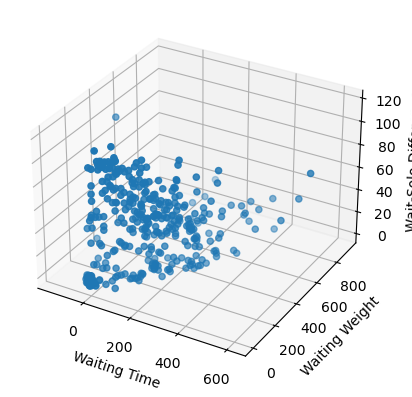

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z = df['waitingTime']
y = df['waitingWeight']
x = df['wait_solo_diff']

ax.scatter(x, y, z)

ax.set_xlabel('Waiting Time')
ax.set_ylabel('Waiting Weight')
ax.set_zlabel('Wait-Solo Difference')

plt.show()
import plotly.express as px

fig = px.scatter_3d(df, z='waitingTime', y='waitingWeight', x='wait_solo_diff')
fig.show()


C:\Users\yangchen\AppData\Local\Temp\ipykernel_14524\2285066148.py:4: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.

C:\Users\yangchen\AppData\Local\Temp\ipykernel_14524\2285066148.py:5: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.

C:\Users\yangchen\AppData\Local\Temp\ipykernel_14524\2285066148.py:6: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.

C:\Users\yangchen\AppData\Local\Temp\ipykernel_14524\2285066148.py:7: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.

C:\Users\yangchen\AppData\Local\Temp\ipykernel_14524\2285066148.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

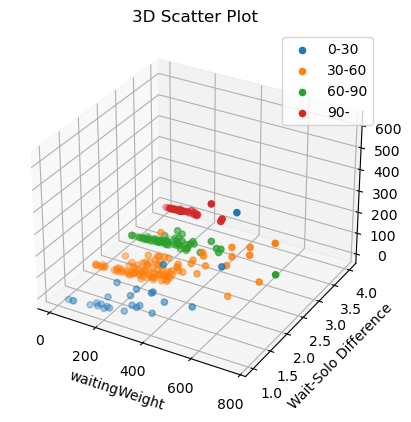

C:\Users\yangchen\AppData\Local\Temp\ipykernel_14524\2285066148.py:51: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.

C:\Users\yangchen\AppData\Local\Temp\ipykernel_14524\2285066148.py:52: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.

C:\Users\yangchen\AppData\Local\Temp\ipykernel_14524\2285066148.py:53: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.

C:\Users\yangchen\AppData\Local\Temp\ipykernel_14524\2285066148.py:54: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.

C:\Users\yangchen\AppData\Local\Temp\ipykernel_14524\2285066148.py:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

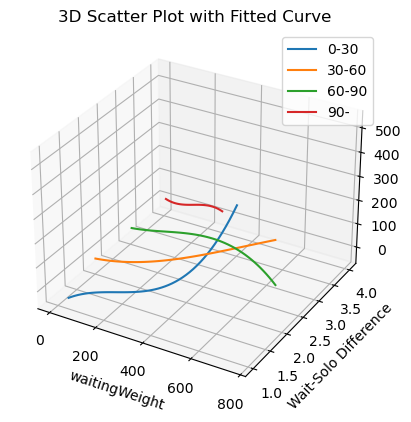

In [134]:
import matplotlib.pyplot as plt
import numpy as np

df1 = df[df['waitingTime'].between(0, 30, inclusive=True)]
df2 = df[df['waitingTime'].between(31, 60, inclusive=True)]
df3 = df[df['waitingTime'].between(61, 90, inclusive=True)]
df4 = df[df['waitingTime'].between(91, np.inf, inclusive=True)]
df1['Time'] = '0-30'
df2['Time'] = '30-60'
df3['Time'] = '60-90'
df4['Time'] = '90-'

# 筛选数据并提取相关列数据
x_a1 = df1['waitingWeight']
y_a1 = df1['soloWeight']

x_a2 = df2['waitingWeight']
y_a2 = df2['soloWeight']

x_a3 = df3['waitingWeight']
y_a3 = df3['soloWeight']

x_a4 = df4['waitingWeight']
y_a4 = df4['soloWeight']

# 创建3D图形实例
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
ax.scatter(x_a1,  np.ones_like(x_a1),y_a1, label='0-30')
ax.scatter(x_a2, 2 * np.ones_like(x_a2), y_a2, label='30-60')
ax.scatter(x_a3, 3 * np.ones_like(x_a3), y_a3, label='60-90')
ax.scatter(x_a4,  4 * np.ones_like(x_a4),y_a4, label='90-')

# 设置图形标题、轴标签和图例
ax.set_title('3D Scatter Plot')
ax.set_xlabel('waitingWeight')
ax.set_ylabel('Wait-Solo Difference')
ax.set_zlabel('t')
ax.legend()

# 显示图形
plt.show()



import matplotlib.pyplot as plt
import numpy as np

df1 = df[df['waitingTime'].between(0, 30, inclusive=True)]
df2 = df[df['waitingTime'].between(31, 60, inclusive=True)]
df3 = df[df['waitingTime'].between(61, 90, inclusive=True)]
df4 = df[df['waitingTime'].between(91, np.inf, inclusive=True)]
df1['Time'] = '0-30'
df2['Time'] = '30-60'
df3['Time'] = '60-90'
df4['Time'] = '90-'

# 筛选数据并提取相关列数据
x_a1 = df1['waitingWeight']
y_a1 = df1['soloWeight']

x_a2 = df2['waitingWeight']
y_a2 = df2['soloWeight']

x_a3 = df3['waitingWeight']
y_a3 = df3['soloWeight']

x_a4 = df4['waitingWeight']
y_a4 = df4['soloWeight']

# 进行曲线拟合
order = 3  # 拟合曲线的阶数
coeffs = np.polyfit(x_a1, y_a1, order)  # 拟合系数
x_fit_1 = np.linspace(min(x_a1), max(x_a1))  # 生成一系列x值
y_fit_1 = np.polyval(coeffs, x_fit_1)  # 计算拟合后的曲线上的对应y值

order = 3  # 拟合曲线的阶数
coeffs = np.polyfit(x_a2, y_a2, order)  # 拟合系数
x_fit_2 = np.linspace(min(x_a2), max(x_a2))  # 生成一系列x值
y_fit_2 = np.polyval(coeffs, x_fit_2)  # 计算拟合后的曲线上的对应y值

order = 3  # 拟合曲线的阶数
coeffs = np.polyfit(x_a3, y_a3, order)  # 拟合系数
x_fit_3 = np.linspace(min(x_a3), max(x_a3))  # 生成一系列x值
y_fit_3 = np.polyval(coeffs, x_fit_1)  # 计算拟合后的曲线上的对应y值

order = 3  # 拟合曲线的阶数
coeffs = np.polyfit(x_a4, y_a4, order)  # 拟合系数
x_fit_4 = np.linspace(min(x_a4), max(x_a4))  # 生成一系列x值
y_fit_4 = np.polyval(coeffs, x_fit_4)  # 计算拟合后的曲线上的对应y值

# 创建图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制拟合曲线
ax.plot(x_fit_1, np.ones_like(x_fit), y_fit_1,  label='0-30')
ax.plot(x_fit_2, 2 * np.ones_like(x_fit), y_fit_2,   label='30-60')
ax.plot(x_fit_3, 3*np.ones_like(x_fit), y_fit_3,  label='60-90')
ax.plot(x_fit_4, 4*np.ones_like(x_fit), y_fit_4,  label='90-')

# 设置图形标题、轴标签和图例
ax.set_title('3D Scatter Plot with Fitted Curve')
ax.set_xlabel('waitingWeight')
ax.set_ylabel('Wait-Solo Difference')
ax.set_zlabel('t')
ax.legend()

# 显示图形
plt.show()


C:\Users\yangchen\AppData\Local\Temp\ipykernel_14524\1525297344.py:5: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.

C:\Users\yangchen\AppData\Local\Temp\ipykernel_14524\1525297344.py:6: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.

C:\Users\yangchen\AppData\Local\Temp\ipykernel_14524\1525297344.py:7: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.

C:\Users\yangchen\AppData\Local\Temp\ipykernel_14524\1525297344.py:8: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.

C:\Users\yangchen\AppData\Local\Temp\ipykernel_14524\1525297344.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

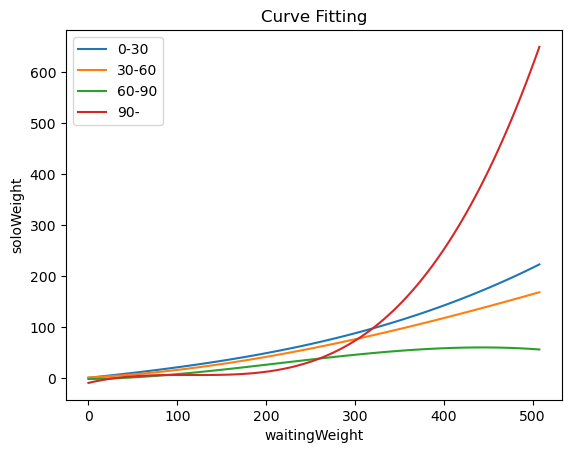

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

df1 = df[df['waitingTime'].between(0, 30, inclusive=True)]
df2 = df[df['waitingTime'].between(31, 60, inclusive=True)]
df3 = df[df['waitingTime'].between(61, 90, inclusive=True)]
df4 = df[df['waitingTime'].between(91, np.inf, inclusive=True)]
df1['Time'] = '0-30'
df2['Time'] = '30-60'
df3['Time'] = '60-90'
df4['Time'] = '90-'

# Define the function to fit the curve
def curve_fit_function(x, a, b, c,d):
    return a * x**3 + b * x**2 + c*x +d

# Perform curve fitting for each dataset
popt1, _ = curve_fit(curve_fit_function, df1['waitingWeight'], df1['soloWeight'])
popt2, _ = curve_fit(curve_fit_function, df2['waitingWeight'], df2['soloWeight'])
popt3, _ = curve_fit(curve_fit_function, df3['waitingWeight'], df3['soloWeight'])
popt4, _ = curve_fit(curve_fit_function, df4['waitingWeight'], df4['soloWeight'])

# Generate x values for the curve
x = np.linspace(min(df1['waitingWeight']), max(df4['waitingWeight']), 100)

# Generate y values based on the fitted parameters
y_fit1 = curve_fit_function(x, *popt1)
y_fit2 = curve_fit_function(x, *popt2)
y_fit3 = curve_fit_function(x, *popt3)
y_fit4 = curve_fit_function(x, *popt4)

# Create a line plot with the fitted curves
plt.plot(x, y_fit1, label='0-30')
plt.plot(x, y_fit2, label='30-60')
plt.plot(x, y_fit3, label='60-90')
plt.plot(x, y_fit4, label='90-')

# Set the title, axis labels, and legend
plt.title('Curve Fitting')
plt.xlabel('waitingWeight')
plt.ylabel('soloWeight')
plt.legend()

# Display the plot
plt.show()


In [2]:
detour_distance_dic = {}
shared_distance_dic = {}
saved_ride_distance_dic = {}
response_rate_dic = {}
carpool_rate_dic = {}
platform_incomes_dic = {}
waiting_times_dic = {}
colors = ['#82B0D2','#FFBE7A','#FA7F6F']
markers = ['*','.','d']
methods = ['FL','MB','RTV']

In [3]:
data = '''
 01:00:00  02:00:00
waitingTime: 234.69117647058823
detour_distance: 651.0503067584418
shared_distance: 5316.348617565201
total_ride_distance: 1460237.1960439738
saved_ride_distance: 248883.37625099564
platform_income: 3821.5418043430755
response_rate: 0.7876447876447876
carpool_rate: 0.6078431372549019
 02:00:00  03:00:00
waitingTime: 232.7008547008547
detour_distance: 787.8157124890851
shared_distance: 4052.3046136546477
total_ride_distance: 842244.2785084391
saved_ride_distance: 64393.50290558842
platform_income: 1993.6758031971626
response_rate: 0.785234899328859
carpool_rate: 0.4444444444444444
 03:00:00  04:00:00
waitingTime: 242.0
detour_distance: 683.045316880128
shared_distance: 3844.2170909575066
total_ride_distance: 433087.0912661553
saved_ride_distance: 27259.39102916976
platform_income: 969.9937416376946
response_rate: 0.6666666666666666
carpool_rate: 0.3793103448275862
 04:00:00  05:00:00
waitingTime: 209.49180327868854
detour_distance: 700.4437248308714
shared_distance: 5521.707909799191
total_ride_distance: 735370.3399670125
saved_ride_distance: 28845.74322096214
platform_income: 1737.7027871703003
response_rate: 0.782051282051282
carpool_rate: 0.22950819672131148
 05:00:00  06:00:00
waitingTime: 141.22222222222223
detour_distance: 634.5895648938558
shared_distance: 15930.445669177085
total_ride_distance: 825455.005549042
saved_ride_distance: 131951.39885450437
platform_income: 2369.6826585214403
response_rate: 0.627906976744186
carpool_rate: 0.3333333333333333
 06:00:00  07:00:00
waitingTime: 210.79166666666666
detour_distance: 720.2713195326926
shared_distance: 5608.780729302976
total_ride_distance: 997797.9386845189
saved_ride_distance: 83364.76180475183
platform_income: 2446.0289725544962
response_rate: 0.7441860465116279
carpool_rate: 0.4166666666666667
 07:00:00  08:00:00
waitingTime: 208.8310502283105
detour_distance: 812.0230130571701
shared_distance: 4619.44952338756
total_ride_distance: 1835328.579228826
saved_ride_distance: 176728.80633912003
platform_income: 4485.938325388186
response_rate: 0.7934782608695652
carpool_rate: 0.5388127853881278
 08:00:00  09:00:00
waitingTime: 213.09024390243903
detour_distance: 778.7665107041908
shared_distance: 4277.790207402142
total_ride_distance: 2935791.1253925473
saved_ride_distance: 388996.77759710804
platform_income: 7257.691790531584
response_rate: 0.7735849056603774
carpool_rate: 0.697560975609756
 09:00:00  10:00:00
waitingTime: 204.45017793594306
detour_distance: 774.6724166779883
shared_distance: 4231.0040211293335
total_ride_distance: 3590887.1059303936
saved_ride_distance: 563148.4294324049
platform_income: 9310.788560286765
response_rate: 0.7971631205673759
carpool_rate: 0.7473309608540926
 10:00:00  11:00:00
waitingTime: 212.2713068181818
detour_distance: 756.8714988946476
shared_distance: 4258.309227432565
total_ride_distance: 4470567.590909171
saved_ride_distance: 773967.6767594022
platform_income: 11532.803079570105
response_rate: 0.8214702450408401
carpool_rate: 0.8011363636363636
 11:00:00  12:00:00
waitingTime: 193.3464467005076
detour_distance: 747.5317303748989
shared_distance: 4422.778249812958
total_ride_distance: 4813706.200434989
saved_ride_distance: 951507.3064455275
platform_income: 12765.901875805934
response_rate: 0.8073770491803278
carpool_rate: 0.8248730964467005
 12:00:00  13:00:00
waitingTime: 195.3244873341375
detour_distance: 712.4729100876052
shared_distance: 4484.302050438784
total_ride_distance: 5041497.346532561
saved_ride_distance: 1034062.4058290878
platform_income: 13533.310596168114
response_rate: 0.831494483450351
carpool_rate: 0.8154402895054282
 13:00:00  14:00:00
waitingTime: 193.37985436893203
detour_distance: 706.8017271917842
shared_distance: 4243.542623810779
total_ride_distance: 5136863.966952585
saved_ride_distance: 950859.5609275422
platform_income: 13725.809030537985
response_rate: 0.8031189083820662
carpool_rate: 0.8155339805825242
 14:00:00  15:00:00
waitingTime: 184.96891191709844
detour_distance: 683.9928572906083
shared_distance: 4139.26610476743
total_ride_distance: 5670801.961603309
saved_ride_distance: 1127911.1188057892
platform_income: 15109.139245719642
response_rate: 0.8354978354978355
carpool_rate: 0.8435233160621761
 15:00:00  16:00:00
waitingTime: 186.24402390438246
detour_distance: 741.2703505086936
shared_distance: 4120.165618213498
total_ride_distance: 5771122.830105843
saved_ride_distance: 1110440.0901395632
platform_income: 15217.115415529224
response_rate: 0.8494077834179357
carpool_rate: 0.8386454183266933
 16:00:00  17:00:00
waitingTime: 187.74003984063745
detour_distance: 757.3862588294772
shared_distance: 4262.779575725819
total_ride_distance: 6053794.8008923195
saved_ride_distance: 1162406.985562283
platform_income: 15912.910598076956
response_rate: 0.8530161427357689
carpool_rate: 0.8426294820717132
 17:00:00  18:00:00
waitingTime: 178.5811965811966
detour_distance: 761.4233799847608
shared_distance: 4299.769186738729
total_ride_distance: 6323826.113172372
saved_ride_distance: 1191299.721083989
platform_income: 16882.68459793074
response_rate: 0.8478260869565217
carpool_rate: 0.8148148148148148
 18:00:00  19:00:00
waitingTime: 195.51135241855874
detour_distance: 735.7026811007963
shared_distance: 4315.348420553307
total_ride_distance: 5850914.260248556
saved_ride_distance: 1205831.8567411276
platform_income: 15676.93596613752
response_rate: 0.8534119629317607
carpool_rate: 0.8371174728529122
 19:00:00  20:00:00
waitingTime: 181.5954446854664
detour_distance: 742.3412018340032
shared_distance: 4332.152975420604
total_ride_distance: 5462019.054369721
saved_ride_distance: 1087733.7584094922
platform_income: 14587.890758645102
response_rate: 0.82174688057041
carpool_rate: 0.8286334056399133
 20:00:00  21:00:00
waitingTime: 193.50379198266523
detour_distance: 739.8316463351135
shared_distance: 3942.555067384179
total_ride_distance: 5289634.55091464
saved_ride_distance: 970379.3592372965
platform_income: 13420.826448407002
response_rate: 0.8278026905829596
carpool_rate: 0.8537378114842904
 21:00:00  22:00:00
waitingTime: 183.4989898989899
detour_distance: 790.2677432442313
shared_distance: 4476.257111005253
total_ride_distance: 5911589.966349388
saved_ride_distance: 1193037.3093009181
platform_income: 15933.041426010188
response_rate: 0.8661417322834646
carpool_rate: 0.8323232323232324
 22:00:00  23:00:00
waitingTime: 185.2527352297593
detour_distance: 741.6377029178369
shared_distance: 3977.0136241296086
total_ride_distance: 5142463.00018817
saved_ride_distance: 950114.2611699889
platform_income: 13483.296550658804
response_rate: 0.8729703915950334
carpool_rate: 0.8336980306345733
'''

time_intervals = []
waiting_times = []
detour_distances = []
shared_distances = []
total_ride_distances = []
saved_ride_distances = []
platform_incomes = []
response_rates = []
carpool_rates = []
Hours= []

lines = data.strip().split('\n')
for i in range(1, len(lines), 9):
    hour = float(lines[i-1].split(':')[0])
    Hours.append(hour)

    waiting_time = float(lines[i].split(':')[1])
    waiting_times.append(waiting_time)

    detour_distance = float(lines[i + 1].split(':')[1])
    detour_distances.append(detour_distance)

    shared_distance = float(lines[i + 2].split(':')[1])
    shared_distances.append(shared_distance)

    total_ride_distance = float(lines[i + 3].split(':')[1])
    total_ride_distances.append(total_ride_distance)

    saved_ride_distance = float(lines[i + 4].split(':')[1])
    saved_ride_distances.append(saved_ride_distance)

    platform_income = float(lines[i + 5].split(':')[1])
    platform_incomes.append(platform_income)

    response_rate = float(lines[i + 6].split(':')[1])
    response_rates.append(response_rate)

    carpool_rate = float(lines[i + 7].split(':')[1])
    carpool_rates.append(carpool_rate)

# 打印提取的指标值
print('Hours',Hours)
print("Waiting Times:", waiting_times)
print("Detour Distances:", detour_distances)
print("Shared Distances:", shared_distances)
print("Total Ride Distances:", total_ride_distances)
print("Saved Ride Distances:", saved_ride_distances)
print("Platform Incomes:", platform_incomes)
print("Response Rates:", response_rates)
print("Carpool Rates:", carpool_rates)

detour_distance_dic['FL'] = detour_distances
shared_distance_dic['FL'] = shared_distances
saved_ride_distance_dic['FL'] = saved_ride_distances
response_rate_dic['FL'] = response_rates
carpool_rate_dic['FL'] = carpool_rates
platform_incomes_dic['FL'] = platform_incomes
waiting_times_dic['FL'] = waiting_times

Hours [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0]
Waiting Times: [234.69117647058823, 232.7008547008547, 242.0, 209.49180327868854, 141.22222222222223, 210.79166666666666, 208.8310502283105, 213.09024390243903, 204.45017793594306, 212.2713068181818, 193.3464467005076, 195.3244873341375, 193.37985436893203, 184.96891191709844, 186.24402390438246, 187.74003984063745, 178.5811965811966, 195.51135241855874, 181.5954446854664, 193.50379198266523, 183.4989898989899, 185.2527352297593]
Detour Distances: [651.0503067584418, 787.8157124890851, 683.045316880128, 700.4437248308714, 634.5895648938558, 720.2713195326926, 812.0230130571701, 778.7665107041908, 774.6724166779883, 756.8714988946476, 747.5317303748989, 712.4729100876052, 706.8017271917842, 683.9928572906083, 741.2703505086936, 757.3862588294772, 761.4233799847608, 735.7026811007963, 742.3412018340032, 739.8316463351135, 790.2677432442313, 741.6377029178369]


In [4]:
data = '''
 01:00:00  02:00:00
waitingTime: 25.337448559670783
detour_distance: 639.5710000624877
shared_distance: 7186.357015088841
total_ride_distance: 1891483.8357875035
saved_ride_distance: 147680.37537409662
platform_income: 4328.874877208933
response_rate: 0.9382239382239382
carpool_rate: 0.205761316872428
 02:00:00  03:00:00
waitingTime: 14.098591549295774
detour_distance: 962.3820603676039
shared_distance: 4456.705614940917
total_ride_distance: 1141287.2339501034
saved_ride_distance: 27851.356436262802
platform_income: 2086.6759889501272
response_rate: 0.9530201342281879
carpool_rate: 0.15492957746478872
 03:00:00  04:00:00
waitingTime: 12.759036144578314
detour_distance: 1059.7385648409083
shared_distance: 3088.625573906305
total_ride_distance: 702942.4626326482
saved_ride_distance: 6784.039109571415
platform_income: 1210.5990286916647
response_rate: 0.9540229885057471
carpool_rate: 0.1686746987951807
 04:00:00  05:00:00
waitingTime: 67.63013698630137
detour_distance: 1017.656697430065
shared_distance: 3988.964897378572
total_ride_distance: 911054.2239540083
saved_ride_distance: 7814.606010073765
platform_income: 1824.7102383000206
response_rate: 0.9358974358974359
carpool_rate: 0.1095890410958904
 05:00:00  06:00:00
waitingTime: 27.735294117647058
detour_distance: 596.3162729642187
shared_distance: 16638.86048796197
total_ride_distance: 1007994.4780860275
saved_ride_distance: 92677.36765220118
platform_income: 2576.0683550550357
response_rate: 0.7906976744186046
carpool_rate: 0.17647058823529413
 06:00:00  07:00:00
waitingTime: 43.91228070175438
detour_distance: 663.7155947051267
shared_distance: 6295.193494924709
total_ride_distance: 1243709.5594424226
saved_ride_distance: 49677.623055144555
platform_income: 2896.609634075349
response_rate: 0.8837209302325582
carpool_rate: 0.17543859649122806
 07:00:00  08:00:00
waitingTime: 17.908730158730158
detour_distance: 962.2633124753395
shared_distance: 5414.892559255578
total_ride_distance: 2277565.53922794
saved_ride_distance: 87259.1483576225
platform_income: 5055.415560749356
response_rate: 0.9130434782608695
carpool_rate: 0.1984126984126984
 08:00:00  09:00:00
waitingTime: 12.07312252964427
detour_distance: 849.7672391613726
shared_distance: 4710.0109967724975
total_ride_distance: 3989264.6462962325
saved_ride_distance: 150523.8259224876
platform_income: 9193.046760056735
response_rate: 0.9547169811320755
carpool_rate: 0.1976284584980237
 09:00:00  10:00:00
waitingTime: 10.01181683899557
detour_distance: 772.2935228971169
shared_distance: 4140.170504789788
total_ride_distance: 4939766.087481831
saved_ride_distance: 210242.26017863982
platform_income: 11773.313329367327
response_rate: 0.9602836879432625
carpool_rate: 0.23929098966026588
 10:00:00  11:00:00
waitingTime: 11.499402628434886
detour_distance: 823.0457882137522
shared_distance: 4601.638915947968
total_ride_distance: 6097846.107745265
saved_ride_distance: 313288.017989169
platform_income: 14363.38753839735
response_rate: 0.9766627771295215
carpool_rate: 0.2532855436081243
 11:00:00  12:00:00
waitingTime: 9.377637130801688
detour_distance: 773.190211082153
shared_distance: 4680.971208184414
total_ride_distance: 6627569.584139643
saved_ride_distance: 391823.8482525134
platform_income: 16189.756179641248
response_rate: 0.9713114754098361
carpool_rate: 0.26371308016877637
 12:00:00  13:00:00
waitingTime: 9.017561983471074
detour_distance: 774.1260287445132
shared_distance: 4916.401612266901
total_ride_distance: 6646766.034540215
saved_ride_distance: 522063.1809905708
platform_income: 16482.079023064078
response_rate: 0.970912738214644
carpool_rate: 0.3202479338842975
 13:00:00  14:00:00
waitingTime: 11.670010030090271
detour_distance: 779.238148416315
shared_distance: 4388.519840747563
total_ride_distance: 6963385.9311012225
saved_ride_distance: 401866.1832359203
platform_income: 17098.882102772077
response_rate: 0.9717348927875243
carpool_rate: 0.2848545636910732
 14:00:00  15:00:00
waitingTime: 8.908108108108108
detour_distance: 687.4616143461614
shared_distance: 4503.716622993621
total_ride_distance: 7422164.562416871
saved_ride_distance: 588213.1581286443
platform_income: 18245.33061383031
response_rate: 0.961038961038961
carpool_rate: 0.3387387387387387
 15:00:00  16:00:00
waitingTime: 8.709677419354838
detour_distance: 771.8230575147959
shared_distance: 4518.932547969051
total_ride_distance: 7450672.1133138295
saved_ride_distance: 589106.713722013
platform_income: 18380.757248854286
response_rate: 0.9703891708967851
carpool_rate: 0.34524847428073235
 16:00:00  17:00:00
waitingTime: 9.841506129597198
detour_distance: 731.9375614147722
shared_distance: 4384.075459910421
total_ride_distance: 7879365.584664787
saved_ride_distance: 566518.8653936898
platform_income: 19707.69966754243
response_rate: 0.9702633814783348
carpool_rate: 0.3397548161120841
 17:00:00  18:00:00
waitingTime: 10.174958540630183
detour_distance: 765.2796213699423
shared_distance: 4650.800022345135
total_ride_distance: 8265638.4892205605
saved_ride_distance: 577244.5442269712
platform_income: 20844.60766374251
response_rate: 0.9710144927536232
carpool_rate: 0.3067993366500829
 18:00:00  19:00:00
waitingTime: 12.899567099567099
detour_distance: 744.0352505950526
shared_distance: 4546.005455874721
total_ride_distance: 7735782.008885503
saved_ride_distance: 562660.031661969
platform_income: 19219.3095083931
response_rate: 0.9730412805391744
carpool_rate: 0.31861471861471863
 19:00:00  20:00:00
waitingTime: 13.884297520661157
detour_distance: 775.1377578105613
shared_distance: 4920.3342637935075
total_ride_distance: 7428026.906801246
saved_ride_distance: 562799.8109447884
platform_income: 18504.051570574586
response_rate: 0.9705882352941176
carpool_rate: 0.30670339761248855
 20:00:00  21:00:00
waitingTime: 9.40590405904059
detour_distance: 823.9584560729426
shared_distance: 4422.983962243334
total_ride_distance: 7124173.682449698
saved_ride_distance: 491186.8678672485
platform_income: 17175.43191765638
response_rate: 0.9721973094170404
carpool_rate: 0.32656826568265684
 21:00:00  22:00:00
waitingTime: 9.9009009009009
detour_distance: 759.1948759113807
shared_distance: 4786.674803433954
total_ride_distance: 7544959.168047467
saved_ride_distance: 643852.1551674051
platform_income: 18670.315151657105
response_rate: 0.9711286089238845
carpool_rate: 0.35495495495495494
 22:00:00  23:00:00
waitingTime: 7.96871945259042
detour_distance: 777.4091325761548
shared_distance: 4440.982140978289
total_ride_distance: 6612777.213560334
saved_ride_distance: 487761.69501459034
platform_income: 16295.471948711895
response_rate: 0.9770773638968482
carpool_rate: 0.3304007820136852
'''

time_intervals = []
waiting_times = []
detour_distances = []
shared_distances = []
total_ride_distances = []
saved_ride_distances = []
platform_incomes = []
response_rates = []
carpool_rates = []
Hours= []

lines = data.strip().split('\n')
for i in range(1, len(lines), 9):
    hour = float(lines[i-1].split(':')[0])
    Hours.append(hour)

    waiting_time = float(lines[i].split(':')[1])
    waiting_times.append(waiting_time)

    detour_distance = float(lines[i + 1].split(':')[1])
    detour_distances.append(detour_distance)

    shared_distance = float(lines[i + 2].split(':')[1])
    shared_distances.append(shared_distance)

    total_ride_distance = float(lines[i + 3].split(':')[1])
    total_ride_distances.append(total_ride_distance)

    saved_ride_distance = float(lines[i + 4].split(':')[1])
    saved_ride_distances.append(saved_ride_distance)

    platform_income = float(lines[i + 5].split(':')[1])
    platform_incomes.append(platform_income)

    response_rate = float(lines[i + 6].split(':')[1])
    response_rates.append(response_rate)

    carpool_rate = float(lines[i + 7].split(':')[1])
    carpool_rates.append(carpool_rate)

# 打印提取的指标值
print('Hours',Hours)
print("Waiting Times:", waiting_times)
print("Detour Distances:", detour_distances)
print("Shared Distances:", shared_distances)
print("Total Ride Distances:", total_ride_distances)
print("Saved Ride Distances:", saved_ride_distances)
print("Platform Incomes:", platform_incomes)
print("Response Rates:", response_rates)
print("Carpool Rates:", carpool_rates)

detour_distance_dic['MB'] = detour_distances
shared_distance_dic['MB'] = shared_distances
saved_ride_distance_dic['MB'] = saved_ride_distances
response_rate_dic['MB'] = response_rates
carpool_rate_dic['MB'] = carpool_rates
platform_incomes_dic['MB'] = platform_incomes
waiting_times_dic['MB'] = waiting_times

Hours [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0]
Waiting Times: [25.337448559670783, 14.098591549295774, 12.759036144578314, 67.63013698630137, 27.735294117647058, 43.91228070175438, 17.908730158730158, 12.07312252964427, 10.01181683899557, 11.499402628434886, 9.377637130801688, 9.017561983471074, 11.670010030090271, 8.908108108108108, 8.709677419354838, 9.841506129597198, 10.174958540630183, 12.899567099567099, 13.884297520661157, 9.40590405904059, 9.9009009009009, 7.96871945259042]
Detour Distances: [639.5710000624877, 962.3820603676039, 1059.7385648409083, 1017.656697430065, 596.3162729642187, 663.7155947051267, 962.2633124753395, 849.7672391613726, 772.2935228971169, 823.0457882137522, 773.190211082153, 774.1260287445132, 779.238148416315, 687.4616143461614, 771.8230575147959, 731.9375614147722, 765.2796213699423, 744.0352505950526, 775.1377578105613, 823.9584560729426, 759.1948759113807, 777.409132576

In [5]:
data = '''
 01:00:00  02:00:00
waitingTime: 7.0546875
detour_distance: 716.6774237583065
shared_distance: 4777.980235863114
total_ride_distance: 2066732.659988505
saved_ride_distance: 93649.51087370205
platform_income: 4743.117002180433
response_rate: 0.9884169884169884
carpool_rate: 0.21875
 02:00:00  03:00:00
waitingTime: 12.608108108108109
detour_distance: 935.4604395734266
shared_distance: 2680.232434555333
total_ride_distance: 1117122.7971457788
saved_ride_distance: 12948.984886535669
platform_income: 2104.2139556327834
response_rate: 0.9932885906040269
carpool_rate: 0.21621621621621623
 03:00:00  04:00:00
waitingTime: 5.952941176470588
detour_distance: 717.4404889348813
shared_distance: 2440.194054072711
total_ride_distance: 712649.2990445053
saved_ride_distance: 3015.9392286088423
platform_income: 1410.4883635420013
response_rate: 0.9770114942528736
carpool_rate: 0.07058823529411765
 04:00:00  05:00:00
waitingTime: 14.294871794871796
detour_distance: 494.74687783987565
shared_distance: 2222.309847187046
total_ride_distance: 956879.6514976696
saved_ride_distance: 6164.080457536476
platform_income: 2093.3110584346646
response_rate: 1.0
carpool_rate: 0.1282051282051282
 05:00:00  06:00:00
waitingTime: 11.726190476190476
detour_distance: 768.5809496522356
shared_distance: 12100.6904537252
total_ride_distance: 1235883.1866218052
saved_ride_distance: 126762.34265304875
platform_income: 3180.295292684784
response_rate: 0.9767441860465116
carpool_rate: 0.2857142857142857
 06:00:00  07:00:00
waitingTime: 8.024193548387096
detour_distance: 664.9867078325982
shared_distance: 7668.308804522904
total_ride_distance: 1322839.1629059408
saved_ride_distance: 57045.01849971939
platform_income: 2987.656535366976
response_rate: 0.9612403100775194
carpool_rate: 0.14516129032258066
 07:00:00  08:00:00
waitingTime: 7.5762081784386615
detour_distance: 1100.361787882148
shared_distance: 3972.5822046014428
total_ride_distance: 2447544.1579873096
saved_ride_distance: 54927.617493951555
platform_income: 5360.318172749316
response_rate: 0.9746376811594203
carpool_rate: 0.23048327137546468
 08:00:00  09:00:00
waitingTime: 5.22972972972973
detour_distance: 1053.6796334912979
shared_distance: 3734.824288687599
total_ride_distance: 4027052.889505582
saved_ride_distance: 115550.01654105519
platform_income: 8748.504392867999
response_rate: 0.9773584905660377
carpool_rate: 0.27413127413127414
 09:00:00  10:00:00
waitingTime: 6.361271676300578
detour_distance: 864.1121612662478
shared_distance: 3431.5004228657217
total_ride_distance: 4953570.699084366
saved_ride_distance: 189063.647136988
platform_income: 11063.710925478139
response_rate: 0.9815602836879432
carpool_rate: 0.3208092485549133
 10:00:00  11:00:00
waitingTime: 4.7305882352941175
detour_distance: 801.0163831400888
shared_distance: 3422.5219041095093
total_ride_distance: 5976051.268475439
saved_ride_distance: 258509.457571765
platform_income: 13403.218528150312
response_rate: 0.9918319719953326
carpool_rate: 0.3341176470588235
 11:00:00  12:00:00
waitingTime: 5.380705394190872
detour_distance: 883.0399227933174
shared_distance: 3772.0391527667043
total_ride_distance: 6687540.945282838
saved_ride_distance: 351042.87875651225
platform_income: 14778.811693618005
response_rate: 0.9877049180327869
carpool_rate: 0.3630705394190871
 12:00:00  13:00:00
waitingTime: 4.731237322515213
detour_distance: 832.6209611183228
shared_distance: 3772.866856816743
total_ride_distance: 6684865.281926005
saved_ride_distance: 410986.8622431189
platform_income: 15293.241929450676
response_rate: 0.9889669007021064
carpool_rate: 0.39553752535496955
 13:00:00  14:00:00
waitingTime: 4.742574257425742
detour_distance: 914.6248385018396
shared_distance: 3263.7644974644304
total_ride_distance: 7044285.554466148
saved_ride_distance: 282599.41963076807
platform_income: 15342.861652705948
response_rate: 0.9844054580896686
carpool_rate: 0.3900990099009901
 14:00:00  15:00:00
waitingTime: 4.875661375661376
detour_distance: 771.9542037181909
shared_distance: 3167.9847354779613
total_ride_distance: 7624579.915873332
saved_ride_distance: 412515.3873225613
platform_income: 16506.332932298126
response_rate: 0.9818181818181818
carpool_rate: 0.4479717813051146
 15:00:00  16:00:00
waitingTime: 4.988879384088965
detour_distance: 805.6285419974638
shared_distance: 3658.120460248353
total_ride_distance: 7517091.966371735
saved_ride_distance: 519903.29756836995
platform_income: 17184.49210166032
response_rate: 0.9890016920473773
carpool_rate: 0.4345594525235244
 16:00:00  17:00:00
waitingTime: 4.962899050905953
detour_distance: 850.1286131916019
shared_distance: 3524.9212487034206
total_ride_distance: 7882592.417551483
saved_ride_distance: 456166.00558005425
platform_income: 17873.90007205391
response_rate: 0.9847068819031436
carpool_rate: 0.4314063848144953
 17:00:00  18:00:00
waitingTime: 4.896326530612245
detour_distance: 937.2667242739288
shared_distance: 3552.545147989017
total_ride_distance: 8383030.051827576
saved_ride_distance: 427892.9833574957
platform_income: 18655.18278025378
response_rate: 0.9863123993558777
carpool_rate: 0.4163265306122449
 18:00:00  19:00:00
waitingTime: 4.846678023850085
detour_distance: 877.8739176408639
shared_distance: 3157.452560056149
total_ride_distance: 7897022.279840522
saved_ride_distance: 335007.4292210868
platform_income: 17700.133931796132
response_rate: 0.9890480202190396
carpool_rate: 0.4071550255536627
 19:00:00  20:00:00
waitingTime: 4.611913357400722
detour_distance: 937.1077708027777
shared_distance: 3662.1265427279486
total_ride_distance: 7629729.016622427
saved_ride_distance: 384400.86524131434
platform_income: 16918.09995757918
response_rate: 0.9875222816399287
carpool_rate: 0.388086642599278
 20:00:00  21:00:00
waitingTime: 4.758620689655173
detour_distance: 849.083272801898
shared_distance: 3518.4405610715503
total_ride_distance: 7060089.189891684
saved_ride_distance: 387718.36529463145
platform_income: 15870.46310000633
response_rate: 0.9883408071748879
carpool_rate: 0.38656987295825773
 21:00:00  22:00:00
waitingTime: 4.937112488928255
detour_distance: 835.3801954434541
shared_distance: 3412.9690533481607
total_ride_distance: 7740952.468419423
saved_ride_distance: 412903.45300331677
platform_income: 17199.856812633
response_rate: 0.9877515310586177
carpool_rate: 0.41984056687333926
 22:00:00  23:00:00
waitingTime: 4.7151106833493746
detour_distance: 874.112274173467
shared_distance: 3171.8187250115143
total_ride_distance: 6802379.837591491
saved_ride_distance: 296107.5887462329
platform_income: 14653.61737410037
response_rate: 0.9923591212989494
carpool_rate: 0.40038498556304136
'''

time_intervals = []
waiting_times = []
detour_distances = []
shared_distances = []
total_ride_distances = []
saved_ride_distances = []
platform_incomes = []
response_rates = []
carpool_rates = []
Hours= []

lines = data.strip().split('\n')
for i in range(1, len(lines), 9):
    hour = float(lines[i-1].split(':')[0])
    Hours.append(hour)

    waiting_time = float(lines[i].split(':')[1])
    waiting_times.append(waiting_time)

    detour_distance = float(lines[i + 1].split(':')[1])
    detour_distances.append(detour_distance)

    shared_distance = float(lines[i + 2].split(':')[1])
    shared_distances.append(shared_distance)

    total_ride_distance = float(lines[i + 3].split(':')[1])
    total_ride_distances.append(total_ride_distance)

    saved_ride_distance = float(lines[i + 4].split(':')[1])
    saved_ride_distances.append(saved_ride_distance)

    platform_income = float(lines[i + 5].split(':')[1])
    platform_incomes.append(platform_income)

    response_rate = float(lines[i + 6].split(':')[1])
    response_rates.append(response_rate)

    carpool_rate = float(lines[i + 7].split(':')[1])
    carpool_rates.append(carpool_rate)

# 打印提取的指标值
print('Hours',Hours)
print("Waiting Times:", waiting_times)
print("Detour Distances:", detour_distances)
print("Shared Distances:", shared_distances)
print("Total Ride Distances:", total_ride_distances)
print("Saved Ride Distances:", saved_ride_distances)
print("Platform Incomes:", platform_incomes)
print("Response Rates:", response_rates)
print("Carpool Rates:", carpool_rates)

detour_distance_dic['RTV'] = detour_distances
shared_distance_dic['RTV'] = shared_distances
saved_ride_distance_dic['RTV'] = saved_ride_distances
response_rate_dic['RTV'] = response_rates
carpool_rate_dic['RTV'] = carpool_rates
platform_incomes_dic['RTV'] = platform_incomes
waiting_times_dic['RTV'] = waiting_times

Hours [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0]
Waiting Times: [7.0546875, 12.608108108108109, 5.952941176470588, 14.294871794871796, 11.726190476190476, 8.024193548387096, 7.5762081784386615, 5.22972972972973, 6.361271676300578, 4.7305882352941175, 5.380705394190872, 4.731237322515213, 4.742574257425742, 4.875661375661376, 4.988879384088965, 4.962899050905953, 4.896326530612245, 4.846678023850085, 4.611913357400722, 4.758620689655173, 4.937112488928255, 4.7151106833493746]
Detour Distances: [716.6774237583065, 935.4604395734266, 717.4404889348813, 494.74687783987565, 768.5809496522356, 664.9867078325982, 1100.361787882148, 1053.6796334912979, 864.1121612662478, 801.0163831400888, 883.0399227933174, 832.6209611183228, 914.6248385018396, 771.9542037181909, 805.6285419974638, 850.1286131916019, 937.2667242739288, 877.8739176408639, 937.1077708027777, 849.083272801898, 835.3801954434541, 874.112274173467]
Sh

In [12]:

# 绘图
colors = ['#FF4500','#05B9E2', '#1E90FF']
colors = ['#F27970', '#8983BF','#63b2ee']
colors = ['#82B0D2','#FFBE7A','#FA7F6F']
methods_name = ['FL','MB','RTV']
import seaborn as sns
import matplotlib.pyplot as plt
label_font = {'family' : 'Times New Roman', 'size'   : 16}
font = {'family' : 'Times New Roman', 'size'   : 18}
x = Hours

plt.figure(figsize=(10, 6)) # 创建一个图形实例，方便同时多画几个图
plt.xlabel('Hours')
for i in range(len(methods)):
    if methods[i] == 'FL':
        plt.plot(x,shared_distance_dic[methods[i]] , label=methods_name[i], marker=markers[i], color = colors[i], linewidth=2)
    else:
        plt.plot(x,shared_distance_dic[methods[i]] , label=methods_name[i], marker=markers[i], color = colors[i], linewidth=2)
plt.legend(prop=label_font)
plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.xticks(fontproperties = 'Times New Roman', size = 18)
plt.xlabel('Hours', fontdict=font)
plt.ylabel('Average shared distance (m)', fontdict=font)
plt.savefig('figure6_{}.png'.format('shared_distance')) 
plt.close()
plt.figure(figsize=(10, 6)) # 创建一个图形实例，方便同时多画几个图
for i in range(len(methods)):
    if methods[i] == 'FL':
        plt.plot(x,detour_distance_dic[methods[i]] , label=methods_name[i], marker=markers[i], color = colors[i], linewidth=2)
    else:
        plt.plot(x,detour_distance_dic[methods[i]] , label=methods_name[i], marker=markers[i], color = colors[i], linewidth=2)
plt.legend(prop=label_font)
plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.xticks(fontproperties = 'Times New Roman', size = 18)
plt.xlabel('Hours', fontdict=font)
plt.ylabel('Average detour distance (m)', fontdict=font)
plt.savefig('figure6_{}.png'.format('detour_distance')) 
plt.close()

# plt.figure(figsize=(10, 6)) # 创建一个图形实例，方便同时多画几个图
# # for i in range(len(methods)):
# #     plt.plot(x,saved_ride_distance_dic[methods[i]] , label=methods_name[i], color = colors[i])
# plt.plot(x,saved_ride_distance_dic[methods[0]] , label=methods_name[0], color = colors[0], linewidth=4)
# plt.plot(x,saved_ride_distance_dic[methods[1]] , label=methods_name[2], color = colors[2], linewidth=2)
# plt.plot(x,saved_ride_distance_dic[methods[2]] , label=methods_name[1], color = colors[1], linewidth=2)
# plt.legend(prop=label_font)
# plt.yticks(fontproperties = 'Times New Roman', size = 18)
# plt.xticks(fontproperties = 'Times New Roman', size = 18)
# plt.xlabel('Hours', fontdict=font)
# plt.ylabel('Total distance savings (km)', fontdict=font)
# plt.savefig('figure6_{}.png'.format('saved_ride_distance')) 
# plt.close()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) # 创建一个图形实例，方便同时多画几个图

# 绘制主坐标轴上的曲线
plt.plot(x, saved_ride_distance_dic[methods[0]], label=methods_name[0], marker=markers[0], color=colors[0], linewidth=2)
plt.plot(x, saved_ride_distance_dic[methods[1]], label=methods_name[2], marker=markers[2], color=colors[2], linewidth=2)
plt.plot(x, saved_ride_distance_dic[methods[2]], label=methods_name[1],marker=markers[1],  color=colors[1], linewidth=2)
plt.legend(prop=label_font)
plt.yticks(fontproperties='Times New Roman', size=18)
plt.xticks(fontproperties='Times New Roman', size=18)
plt.xlabel('Hours', fontdict=font)
plt.ylabel('Total distance savings (km)', fontdict=font)

plt.savefig('figure6_{}.png'.format('saved_ride_distance'))
plt.close()




plt.figure(figsize=(10, 6)) # 创建一个图形实例，方便同时多画几个图
for i in range(len(methods)):
    if methods[i] == 'FL':
        plt.plot(x,response_rate_dic[methods[i]] , label=methods_name[i], marker=markers[i], color = colors[i], linewidth=2)
        # plt.scatter(x, response_rate_dic[methods[i]], marker=markers[i], color=colors[i])
    else:
        plt.plot(x,response_rate_dic[methods[i]] , label=methods_name[i], marker=markers[i], color = colors[i], linewidth=2)
        # plt.scatter(x, response_rate_dic[methods[i]], marker=markers[i], color=colors[i])

plt.legend(prop=label_font)
plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.xticks(fontproperties = 'Times New Roman', size = 18)
plt.xlabel('Hours', fontdict=font)
plt.ylabel('Response rate', fontdict=font)
plt.savefig('figure6_{}.png'.format('response_rate')) 
plt.close()
plt.figure(figsize=(10, 6)) # 创建一个图形实例，方便同时多画几个图
for i in range(len(methods)):
    plt.plot(x,carpool_rate_dic[methods[i]] , label=methods_name[i], color = colors[i])
    plt.scatter(x, carpool_rate_dic[methods[i]], marker=markers[i], color=colors[i])
plt.legend(prop=label_font)
plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.xticks(fontproperties = 'Times New Roman', size = 18)
plt.xlabel('Hours', fontdict=font)
plt.ylabel('Pairing ratio', fontdict=font)
plt.savefig('figure6_{}.png'.format('carpool_rate')) 
plt.close()

plt.figure(figsize=(10, 6)) # 创建一个图形实例，方便同时多画几个图
for i in range(len(methods)):
    plt.plot(x,platform_incomes_dic[methods[i]] , label=methods_name[i], color = colors[i])
    plt.scatter(x, platform_incomes_dic[methods[i]], marker=markers[i], color=colors[i])
plt.legend(prop=label_font)
plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.xticks(fontproperties = 'Times New Roman', size = 18)
plt.xlabel('Hours', fontdict=font)
plt.ylabel('Net profit', fontdict=font)
plt.savefig('figure6_{}.png'.format('profit')) 
plt.close()

plt.figure(figsize=(10, 6)) # 创建一个图形实例，方便同时多画几个图
for i in range(len(methods)):
    plt.plot(x,waiting_times_dic[methods[i]] , label=methods_name[i], color = colors[i])
    plt.scatter(x, waiting_times_dic[methods[i]], marker=markers[i], color=colors[i])
plt.legend(prop=label_font)
plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.xticks(fontproperties = 'Times New Roman', size = 18)
plt.xlabel('Hours', fontdict=font)
plt.ylabel('Average waiting time for a response', fontdict=font)
plt.savefig('figure6_{}.png'.format('waiting_time')) 
plt.close()

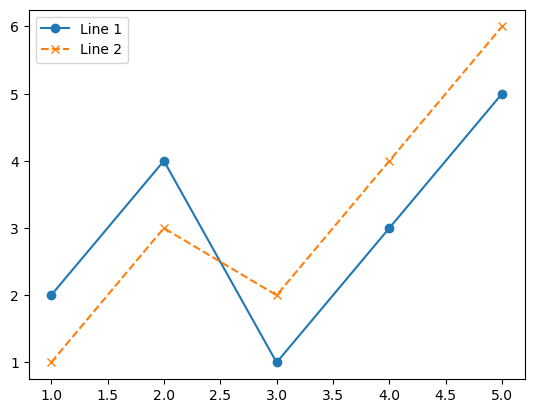

In [11]:
import matplotlib.pyplot as plt

# 数据
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 1, 3, 5]
y2 = [1, 3, 2, 4, 6]

# 使用不同的线型和标记绘制曲线
plt.plot(x, y1, linestyle='-', marker='o', label='Line 1')
plt.plot(x, y2, linestyle='--', marker='x', label='Line 2')

# 显示图例
plt.legend()

# 显示图形
plt.show()


In [49]:
plt.figure(figsize=(10, 6)) # 创建一个图形实例，方便同时多画几个图
y = [1006
,647
,379
,313
,384
,677
,1150
,2035
,2581
,3091
,3623
,3745
,3951
,4583
,4449
,4541
,5138
,5399
,4495
,4386
,4879
,4119
]
plt.plot(x,y , label='Demand', color = '#76da91')
plt.plot(x,[int(r/4) for r in y] , label='Supply', color = '#f89588')
plt.legend(prop=label_font)
plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.xticks(fontproperties = 'Times New Roman', size = 18)
plt.xlabel('Hours', fontdict=font)
plt.ylabel('Count', fontdict=font)
plt.savefig('figure5_{}.png'.format('Supply_demand_hour')) 
plt.close()


plt.figure(figsize=(10, 6)) # 创建一个图形实例，方便同时多画几个图
y = [2035
,3094
,3088
,3075
,3074
,2734
,2281
,3478
,3297
,3276
,3362
,3406
,4243
,2500
,3515
,3226
,3146
,2973
,3375
,3407
,2719
]
dates = [
    1	
,2	
,3	
,4	
,5	
,6	
,7	
,8	
,9	
,10
,11
,12
,13
,14
,15
,16
,17
,18
,19
,20
,21

]
plt.plot(dates,y , label='Demand', color = '#76da91')
plt.plot(dates,[int(r/4) for r in y] , label='Supply', color = '#f89588')
plt.legend(prop=label_font)
plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.xticks(fontproperties = 'Times New Roman', size = 18)  # 设置整数刻度
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Dates', fontdict=font)
plt.ylabel('Count', fontdict=font)
plt.savefig('figure5_{}.png'.format('Supply_demand_dates')) 
plt.close()